# Advanced Visualization 

# Tutorial

In [22]:
import pandas as pd
import os
os.getcwd()

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
movies = pd.read_csv('S6-Movie-Ratings.csv')
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', \
       'BudgetMillions', 'Year']

In [49]:
# cast columsn to categories
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [21]:
movies.info()
movies.Genre.cat.categories
movies.Year.cat.categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMissions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

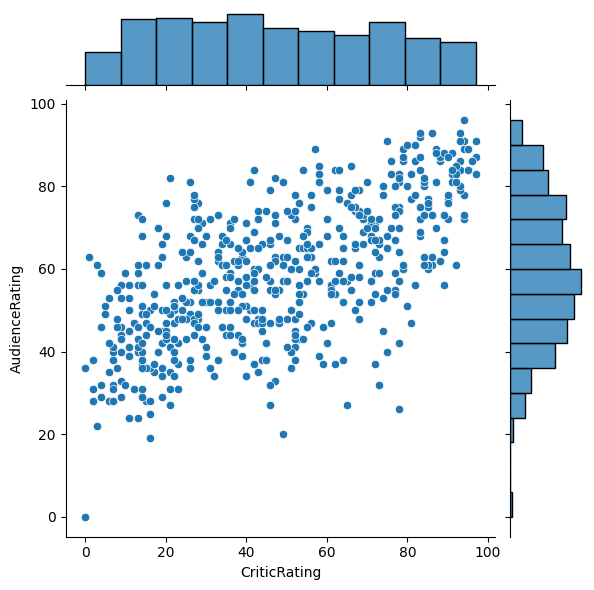

In [30]:
#Joint plots
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='scatter')

## Histogram

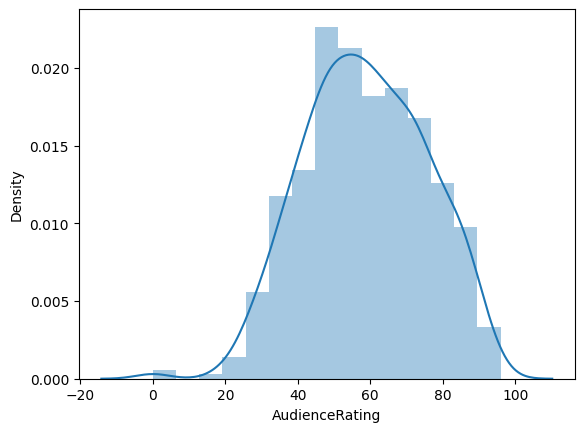

In [31]:
hist = sns.distplot(movies.AudienceRating,bins=15)

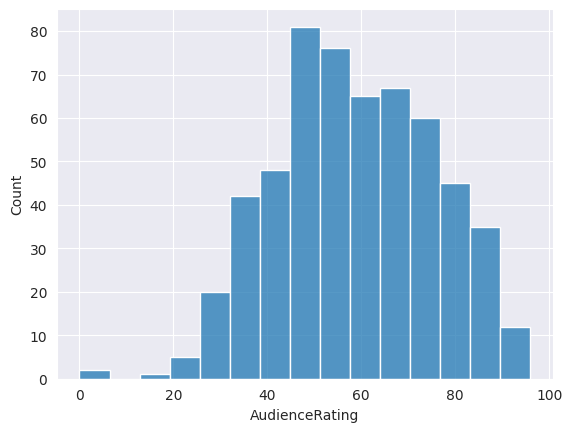

In [34]:
sns.set_style('darkgrid')
hist = sns.histplot(movies.AudienceRating,bins=15)

##### Stacked Histogram

In [63]:
print(movies.groupby(['Genre'])['BudgetMillions'].sum())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(movies[['Genre', 'BudgetMillions']])


Genre
Action       13033
Adventure     2363
Comedy        6211
Drama         2813
Horror        1062
Romance        632
Thriller      1968
Name: BudgetMillions, dtype: int64
         Genre  BudgetMillions
0       Comedy               8
1    Adventure             105
2       Action              20
3    Adventure              18
4       Comedy              20
5       Action             200
6       Comedy              30
7       Horror              32
8       Comedy              28
9       Comedy               8
10       Drama              30
11       Drama              20
12      Horror              35
13       Drama               7
14      Comedy              19
15      Action              35
16     Romance              45
17      Comedy              10
18       Drama               8
19   Adventure             200
20      Horror              40
21   Adventure              45
22      Comedy              15
23       Drama              20
24   Adventure              40
25    Thriller      

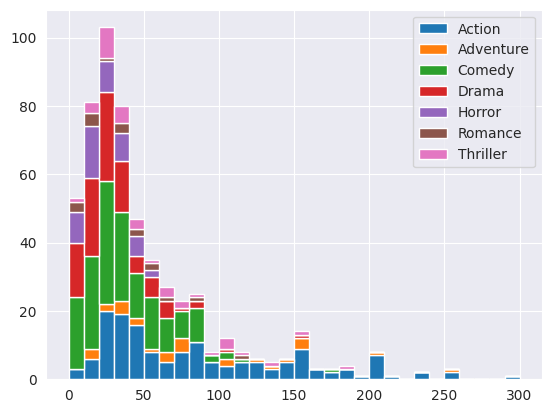

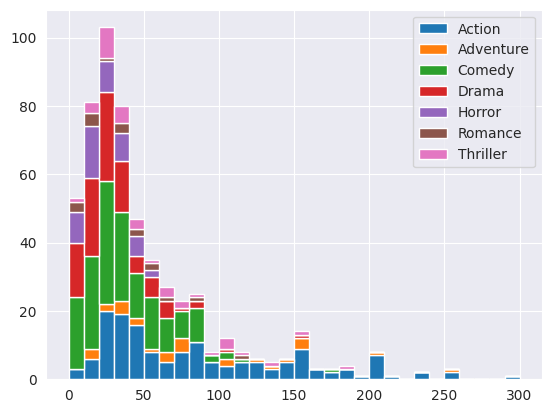

In [ ]:
# plt.hist(movies[movies.Genre=='Action'].BudgetMillions, bins = 15)
# plt.hist(movies[movies.Genre=='Drama'].BudgetMillions, bins = 15)
# plt.hist(movies[movies.Genre=='Thriller'].BudgetMillions, bins = 15)
allGenreBudget=[]
myLabels = []
for i in movies.Genre.cat.categories:
    allGenreBudget.append(movies[movies.Genre==i].BudgetMillions)
    myLabels.append(i)
plt.hist(allGenreBudget, bins = 30, stacked = True, label=movies.Genre.cat.categories)
plt.legend()
plt.show()


In [78]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(movies[movies.Genre=='Thriller'][['Genre','BudgetMillions']].sort_values(['BudgetMillions']))

        Genre  BudgetMillions
237  Thriller               4
432  Thriller              13
471  Thriller              15
105  Thriller              15
261  Thriller              20
389  Thriller              20
253  Thriller              20
95   Thriller              20
408  Thriller              20
494  Thriller              21
498  Thriller              22
243  Thriller              25
225  Thriller              27
513  Thriller              30
358  Thriller              32
491  Thriller              35
503  Thriller              35
515  Thriller              35
522  Thriller              40
189  Thriller              40
424  Thriller              48
385  Thriller              51
180  Thriller              60
72   Thriller              60
556  Thriller              65
267  Thriller              70
519  Thriller              75
282  Thriller              85
419  Thriller              90
407  Thriller             100
25   Thriller             100
481  Thriller             100
394  Thril

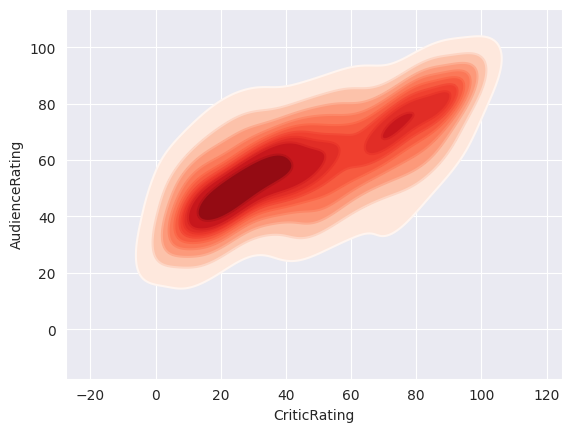

In [94]:
# # movies.AudienceRating
k1 = sns.kdeplot(data=movies, x = 'CriticRating', y='AudienceRating', shade=True, shade_lowest=False, cmap='Reds')
k1 = sns.kdeplot(data=movies, x = 'CriticRating', y='AudienceRating', cmap='Reds',)

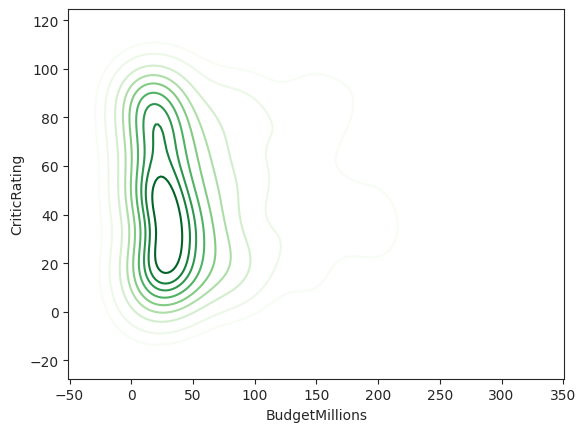

In [115]:
# Subplots
sns.set_style("ticks")
k1 = sns.kdeplot(data=movies, x = 'BudgetMillions', y='CriticRating', cmap='Greens', shade_lowest=False)


[(-20.0, 200.0)]

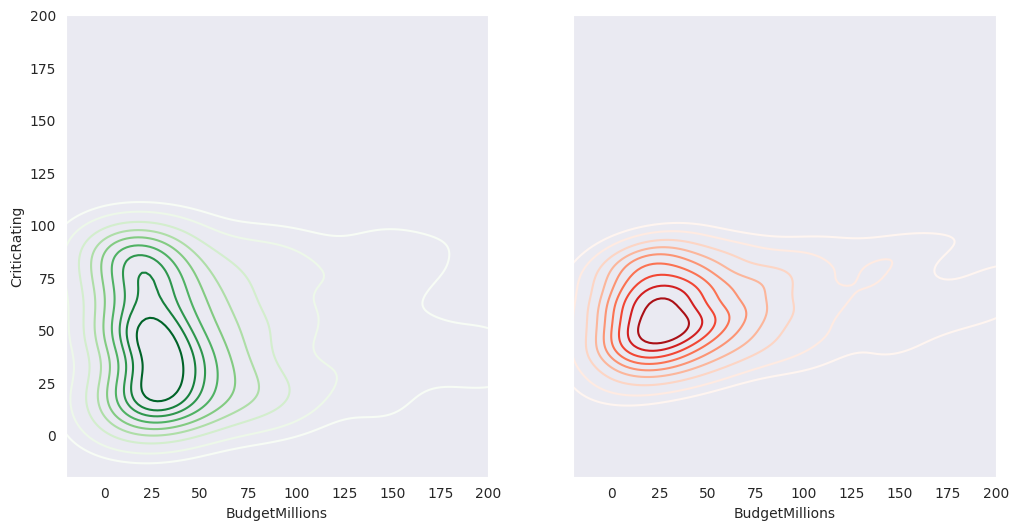

In [ ]:
sns.set_palette("dark")
f, ax = plt.subplots(1,2, figsize=(12,6),sharex=True, sharey=True) # 1 row 2 columns, 2 charts, figsize tuple (12,6) = 12 width, 6 height
k1 = sns.kdeplot(data=movies, x = 'BudgetMillions', y='CriticRating', cmap='Greens',  ax=ax[0])
k2 = sns.kdeplot(data=movies, x = 'BudgetMillions', y='AudienceRating', cmap='Reds', ax=ax[1])
k1.set(xlim=(-20,200))
k1.set(ylim=(-20,200))


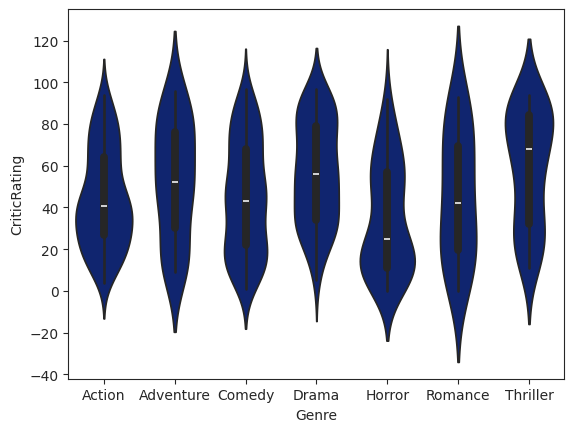

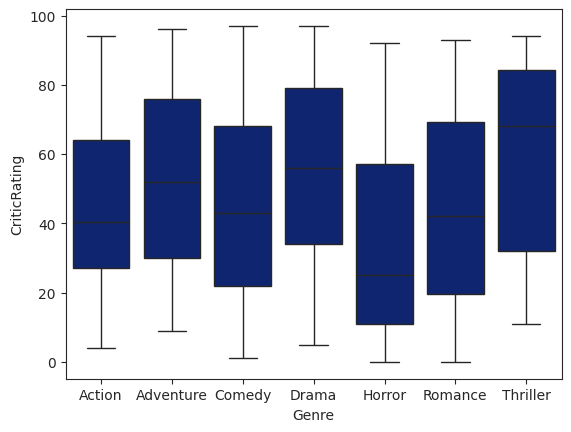

In [116]:
v = sns.violinplot(data=movies, x='Genre', y='CriticRating')
plt.show()
b = sns.boxplot(data=movies, x = 'Genre', y='CriticRating')
plt.show()

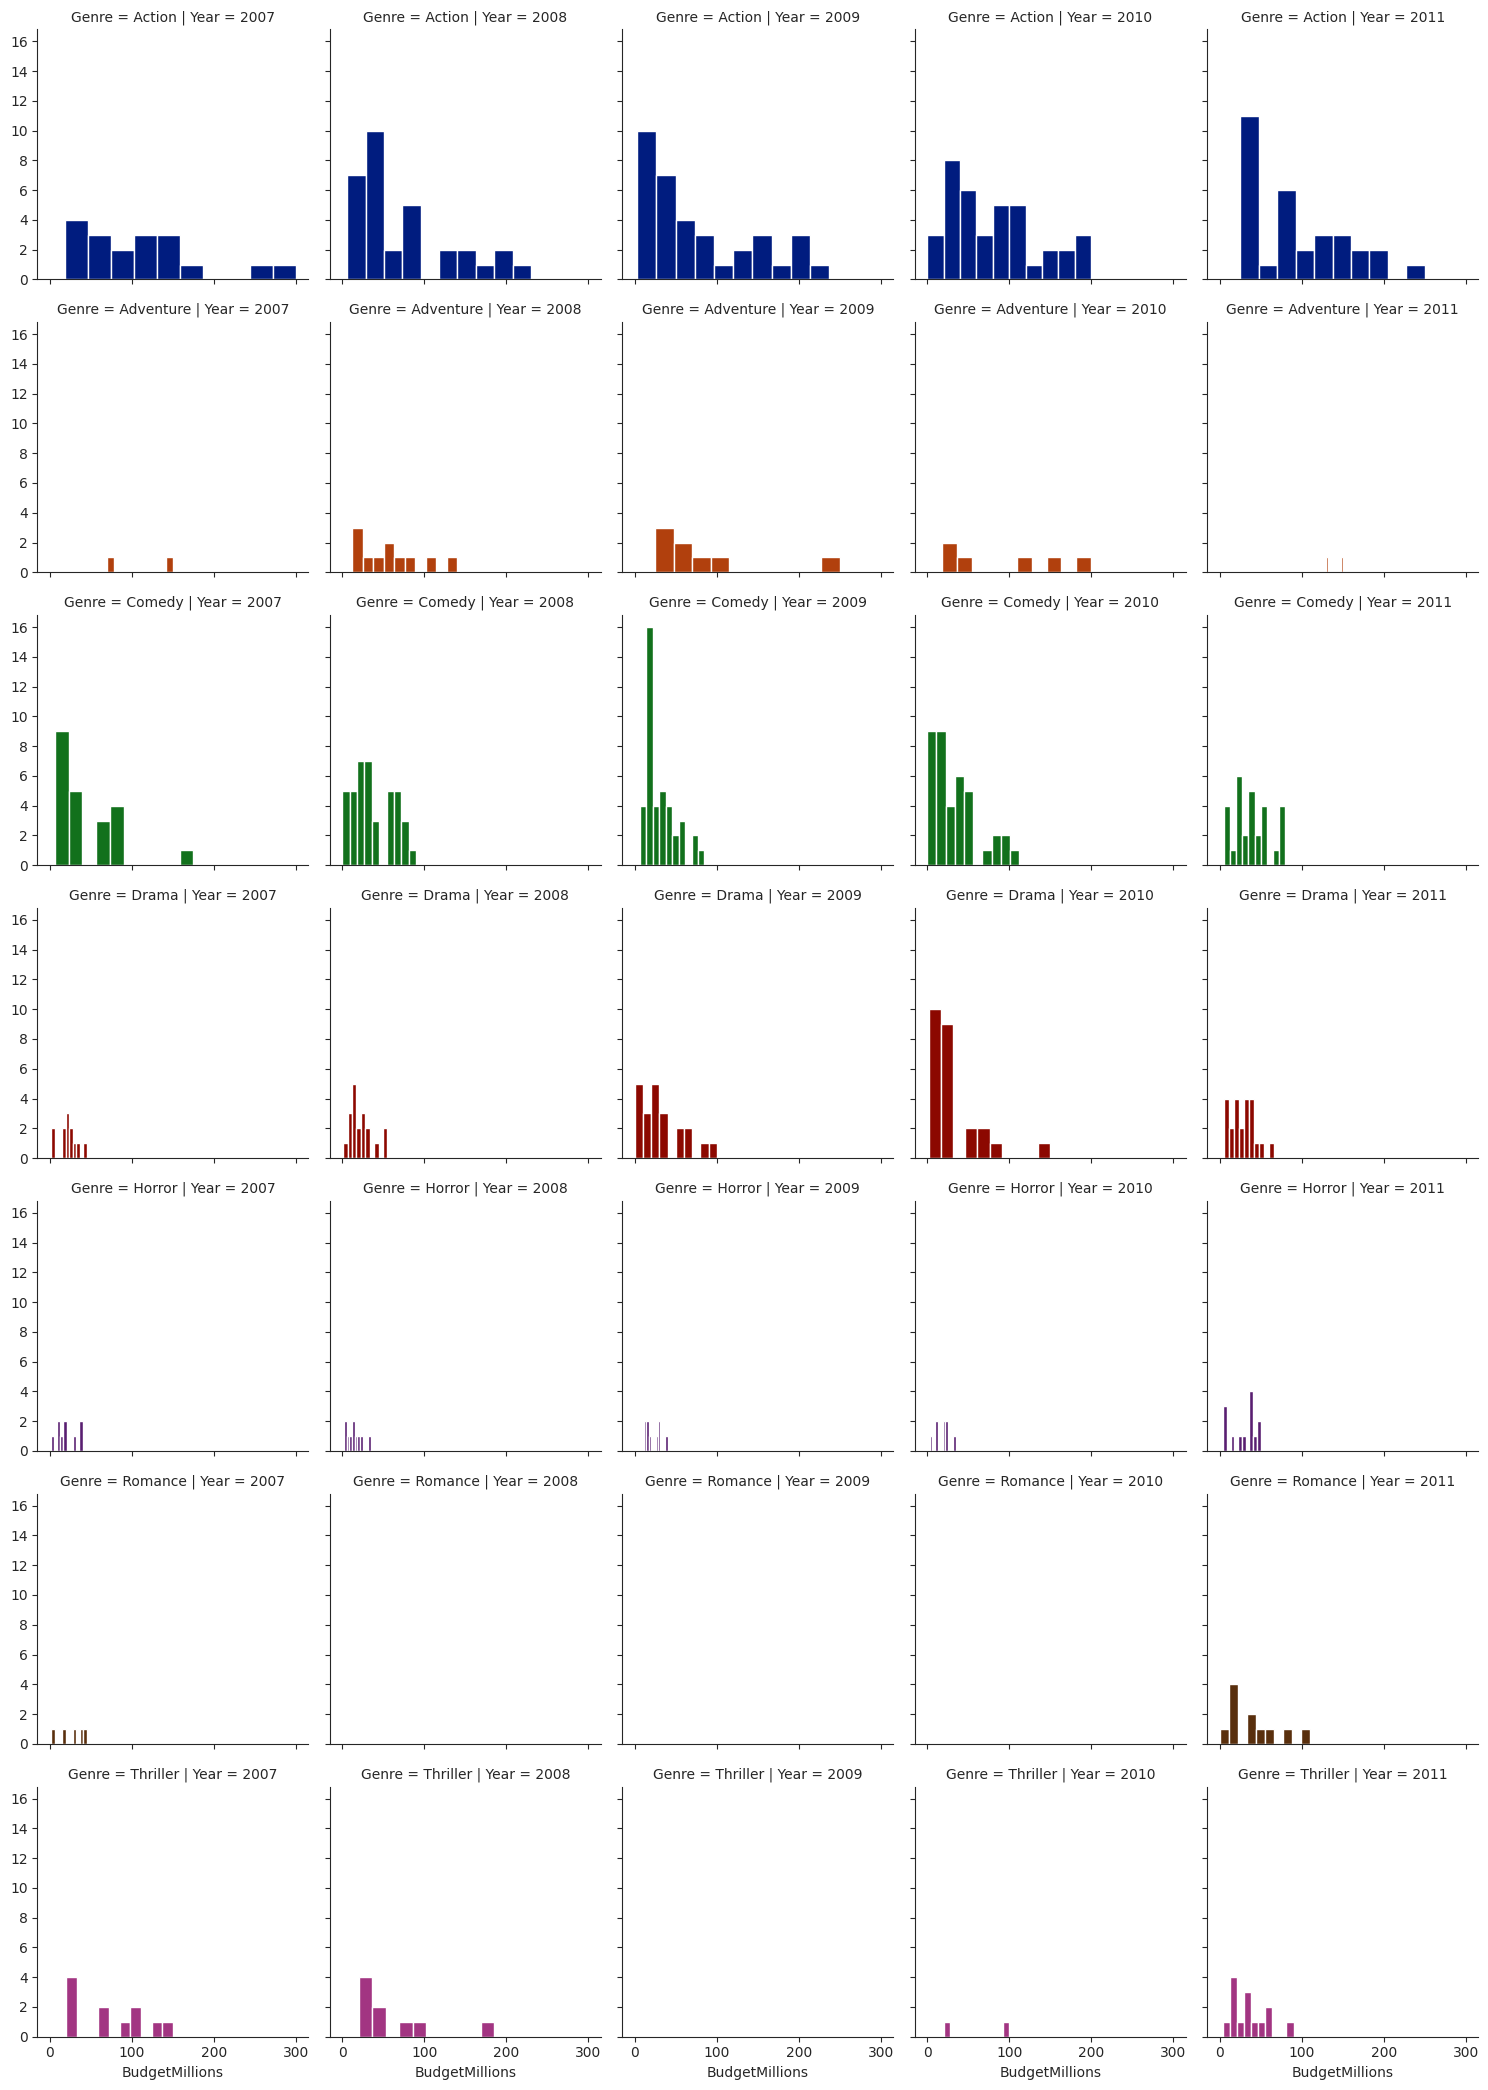

In [125]:
# Facet Grid

g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
# g = g.map(plt.scatter, "CriticRating", "AudienceRating")
g = g.map(plt.hist, "BudgetMillions")

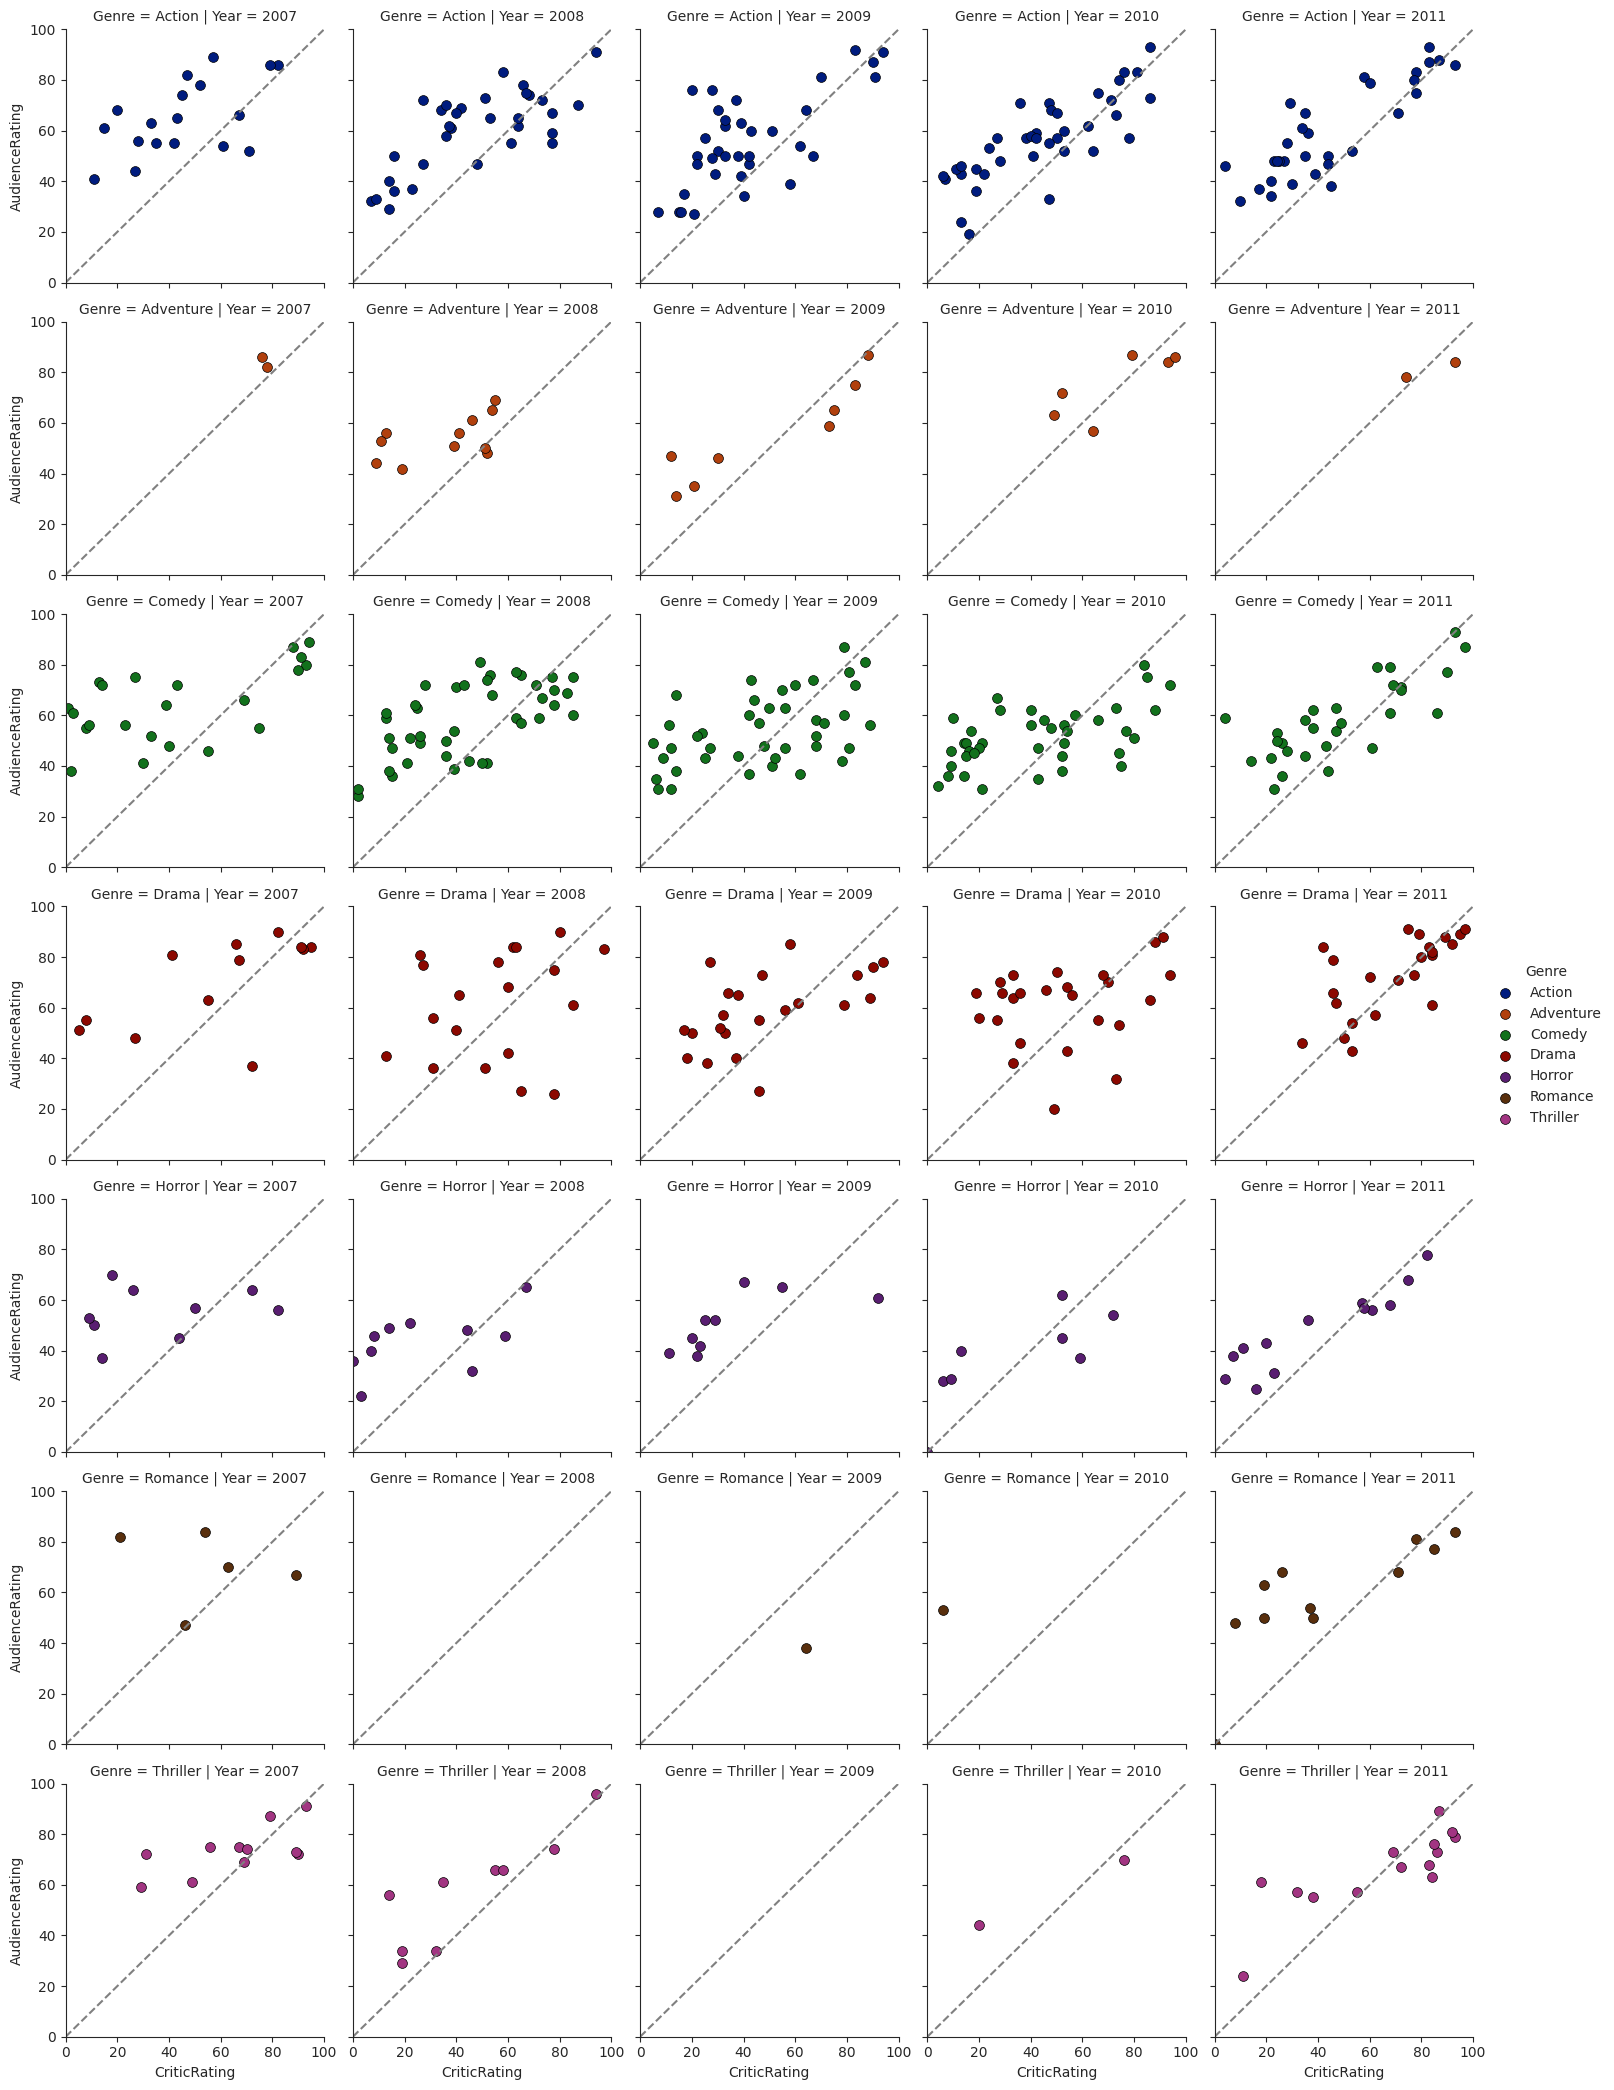

In [130]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = {"s": 50, "linewidth": .5, 'edgecolor': 'black'}
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)

g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', linestyle="--")
g.add_legend()